In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering

In [3]:
df = pd.read_csv('train.csv')

## Assessing

In [ ]:
df.head()

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

- <i> Issue No 1: Need to address missing values for columns Age, Cabin, and Embarked. <i/>

In [ ]:
df.duplicated().sum() #Zero duplicates 

In [ ]:
df.dtypes

In [ ]:
df.info()

## Cleaning

- <b><i> Issue No 1: Need to address missing values for columns Age, Cabin, and Embarked. <i/><b/>

<b> Solving Issue No 1: Need to address missing values for columns Age, Cabin, and Embarked. <b/>

In [ ]:
df_clean = df.copy() #making copy so that orignal data set remains intact.

Column Cabin contains alot of missing values, so I think it will be a good idea to drop this column.

In [ ]:
df_clean.drop(['Cabin'],1,inplace=True)

In [ ]:
df_clean.isna().sum()[df_clean.isna().sum() > 0]

Now we are left with only two columns. Let's fill missing value for Age column first.

In [ ]:
#Let's visualize distribution of Age.
df_clean.Age.plot(kind='hist',bins=np.arange(0,85,10),grid=True,figsize=(10,7));
plt.yticks(np.arange(0,250,15));
plt.xlabel('Age');

In [ ]:
df_clean.Age.describe()

In [ ]:
plt.subplots(figsize = (10,8))
sns.boxplot(x='Pclass',y='Age',data=df_clean);
plt.yticks(np.arange(0,82,3));

In [ ]:
#print (df_clean.groupby('Pclass')['Age'].mean().loc[:])
def fill_age(row):
    #print(str(row['Age'] )== 'nan')
    if str(row['Age'] )== 'nan' : 
        if row['Pclass'] == 1:
            return df_clean.groupby('Pclass')['Age'].mean().loc[1]
        if row['Pclass'] == 2:
            return df_clean.groupby('Pclass')['Age'].mean().loc[2]
        else:
            return df_clean.groupby('Pclass')['Age'].mean().loc[3]
    else:
        return row['Age']



In [ ]:
df_clean.Age = df_clean[['Age','Pclass']].apply(fill_age,1)

In [ ]:
df_clean.drop (df_clean[df_clean.Embarked.isnull()].index,inplace=True) #Dropping rows where Embarked is Null.

In [ ]:
df_clean.isnull().sum()

Now we don't have any missing values.

# Exploratory Data Analysis

In [ ]:
df_clean.head()

Lets drop columns that are irrelevant for analysis.

In [ ]:
columns_to_drop = ['PassengerId','Name','Parch','Ticket','Embarked']
df_clean.drop(columns_to_drop,1,inplace=True)

In [9]:
df_clean.head()

NameError: name 'df_clean' is not defined

Now we will continue to explore data with intentions to find relationship among Survived and other columns.

In [6]:
sns.countplot(x='Sex',data=df_clean);

NameError: name 'df_clean' is not defined

- More Males than females.

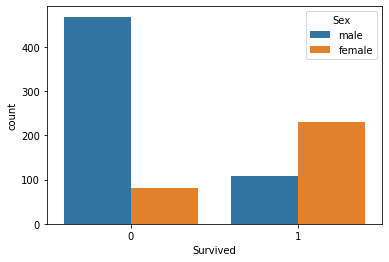

In [23]:
sns.countplot(hue='Sex',x='Survived',data=df_clean);

- Most of the survivors are females.

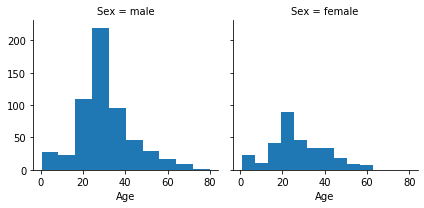

In [24]:
grid = sns.FacetGrid(col='Sex', data=df_clean)
grid.map(plt.hist,'Age');

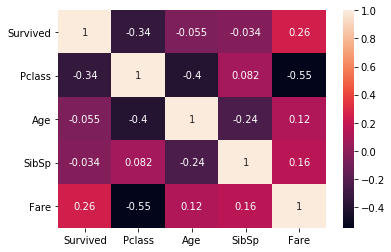

In [25]:
sns.heatmap (df_clean.corr(),annot=True);

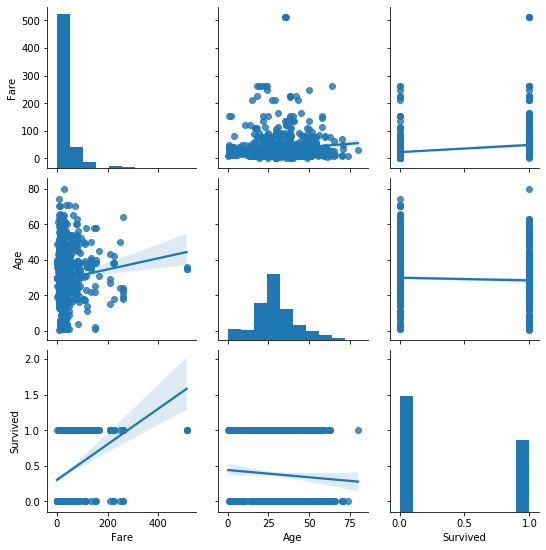

In [26]:
grid = sns.PairGrid(data=df_clean, vars=['Fare','Age','Survived'])
grid.map_diag(plt.hist)
grid.map_offdiag(sns.regplot);

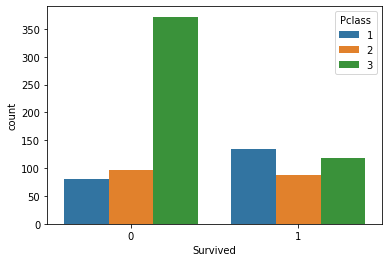

In [27]:
sns.countplot(hue='Pclass',x='Survived',data=df_clean);

- There are almost same number of survivors from passenger class 1 and 3. Most of the passengers of class 3 did not survive.

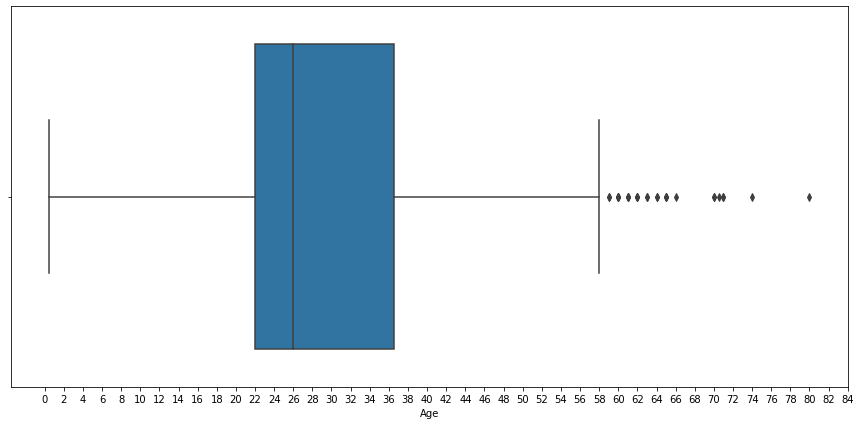

In [28]:
plt.subplots(figsize=(15,7))
sns.boxplot(x=df_clean.Age);
plt.xticks(np.arange(0,85,2));

# Predicting Survival

In [29]:
target = df_clean.Survived
inputs = df_clean.iloc[: , 1:]

In [30]:
print (target)
inputs

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


,Pclass,Sex,Age,SibSp,Fare
0,3,male,22.00000,1,7.2500
1,1,female,38.00000,1,71.2833
2,3,female,26.00000,0,7.9250
3,1,female,35.00000,1,53.1000
4,3,male,35.00000,0,8.0500
...,...,...,...,...,...
886,2,male,27.00000,0,13.0000
887,1,female,19.00000,0,30.0000
888,3,female,25.14062,1,23.4500
889,1,male,26.00000,0,30.0000


In [31]:
dummies = pd.get_dummies(df_clean.Sex) #creating dummy variables for Sex column.
inputs = pd.concat([inputs,dummies],axis=1)

In [32]:
inputs.drop(['Sex','female'],1,inplace=True)

In [33]:
print(target)
inputs

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


,Pclass,Age,SibSp,Fare,male
0,3,22.00000,1,7.2500,1
1,1,38.00000,1,71.2833,0
2,3,26.00000,0,7.9250,0
3,1,35.00000,1,53.1000,0
4,3,35.00000,0,8.0500,1
...,...,...,...,...,...
886,2,27.00000,0,13.0000,1
887,1,19.00000,0,30.0000,0
888,3,25.14062,1,23.4500,0
889,1,26.00000,0,30.0000,1


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(inputs,target,test_size=0.2)

In [47]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
pred = model.predict(X_test)

In [36]:
model.score(X_test,Y_test)

0.8033707865168539

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,inputs,target,cv=10,scoring='accuracy').mean()

0.7862870275791624

In [38]:
from sklearn.svm import SVC

model_SVC = SVC()
model_SVC.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
model_SVC.score(X_test,Y_test)

0.6966292134831461

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_SVC,inputs,target,cv=10,scoring='accuracy').mean()

0.6760342185903984

In [41]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
model_dtc.score(X_test,Y_test)

0.8258426966292135

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_dtc,inputs,target,cv=10,scoring='accuracy').mean()

0.7829417773237999

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_test,Y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
model_knn.score(X_test,Y_test)

0.8089887640449438

In [277]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_knn,inputs,target,cv=10,scoring='accuracy').mean()

0.7064862104187946

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

print(mean_absolute_error(Y_test,pred))
print(accuracy_score(Y_test,pred))

0.19662921348314608
0.8033707865168539
